In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, 
# running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from fastai.vision.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
torch.cuda.is_available()

True

In [ ]:
pip install --user torch==1.9.0 torchvision==0.10.0 torchaudio==0.9.0 torchtext==0.10.0

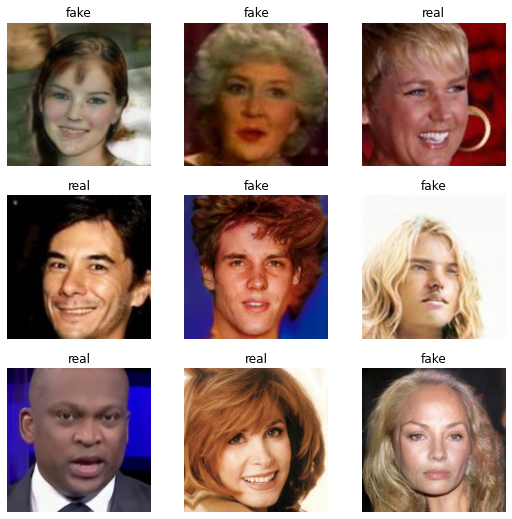

In [8]:
train_df=pd.read_csv("../input/fake-image-classification-challenge/data/train.csv")
dls=ImageDataLoaders.from_df(train_df,path="../input/fake-image-classification-challenge",batch_tfms=aug_transforms(max_warp=0.05, max_zoom=0.05),valid_pct=0.05)
dls.show_batch()

In [9]:
learn = cnn_learner(dls, xresnet50, metrics=error_rate,pretrained=False)
learn.fit_one_cycle(60)


epoch,train_loss,valid_loss,error_rate,time
0,0.965008,0.683769,0.351111,02:17
1,0.868977,0.619301,0.324444,02:16
2,0.818908,0.652126,0.337778,02:17
3,0.756518,0.687430,0.351111,02:16
4,0.722232,0.704707,0.343333,02:16
5,0.651720,0.543336,0.280000,02:17
6,0.591729,0.604042,0.326667,02:16
7,0.534265,0.542466,0.282222,02:17
8,0.463228,0.343922,0.155556,02:16
9,0.334523,0.349419,0.167778,02:17


In [5]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,nan,None,None,00:00
1,nan,None,None,00:00
2,nan,None,None,00:00
3,nan,None,None,00:00
4,nan,None,None,00:00
5,nan,None,None,00:00
6,nan,None,None,00:00
7,nan,None,None,00:00
8,nan,None,None,00:00
9,nan,None,None,00:00


/opt/conda/lib/python3.7/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [ ]:
from fastai.imports import *
path.ls()

In [ ]:
learn.fit_one_cycle(5)


In [ ]:
learn.export('../../working/Xres5060.pkl')

In [10]:
files = get_image_files("../input/fake-image-classification-challenge/data/test")
len(files)


13500

In [ ]:
import pickle
with open('predictions.pkl','wb') as fhand:
    pickle.dump(pred,fhand)


In [11]:
pred={}
count=0
for i in files:
    count+=1
    if count%100==0:
        print(count)
    c=learn.predict(i)
    pred[str(i)]=str(c[0])
print("done")

100


200


300


400


500


600


700


800


900


1000


1100


1200


1300


1400


1500


1600


1700


1800


1900


2000


2100


2200


2300


2400


2500


2600


2700


2800


2900


3000


3100


3200


3300


3400


3500


3600


3700


3800


3900


4000


4100


4200


4300


4400


4500


4600


4700


4800


4900


5000


5100


5200


5300


5400


5500


5600


5700


5800


5900


6000


6100


6200


6300


6400


6500


6600


6700


6800


6900


7000


7100


7200


7300


7400


7500


7600


7700


7800


7900


8000


8100


8200


8300


8400


8500


8600


8700


8800


8900


9000


9100


9200


9300


9400


9500


9600


9700


9800


9900


10000


10100


10200


10300


10400


10500


10600


10700


10800


10900


11000


11100


11200


11300


11400


11500


11600


11700


11800


11900


12000


12100


12200


12300


12400


12500


12600


12700


12800


12900


13000


13100


13200


13300


13400


13500


done


In [ ]:
import pickle
with open('predictionsxres5060.pkl','wb') as fhand:
    pickle.dump(pred,fhand)

In [4]:
learn=load_learner("../input/xres5060fakeimage/Xres5060.pkl",cpu=False)

In [12]:
preds=sorted(pred)

In [13]:
paths=["/".join((i.replace("\\","/")).split("/")[-3:]) for i in list(pred.keys())]
paths[0]

paths=[]
val=[]
for i in preds:
    paths.append("/".join((i.replace("\\","/")).split("/")[-3:]))
    val.append(pred[i])

In [14]:
data={'path':paths,'label':val}
import pandas as pd

df=pd.DataFrame(data)
df.head()

,path,label
0,data/test/00000.jpg,real
1,data/test/00001.jpg,fake
2,data/test/00002.jpg,fake
3,data/test/00003.jpg,real
4,data/test/00004.jpg,fake


In [15]:
df.to_csv('Submission5.csv',index=False)